<a href="https://colab.research.google.com/github/amanislamm/Telco-Churn-Analysis/blob/main/Aman_Islam_Telco_Assignment_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.55;background-color: #E94B3C"><b>Telco Customer Churn Classification</b><br></h1>

<center>
    <img src="https://usercontent.one/wp/www.alltopeverything.com/wp-content/uploads/2021/08/telecommunications-3840285_1280.jpg?media=1659724391" alt="Telco Customer Churn" width="50%">
</center>

### **Problem Statement:**

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!

### **Objectives:**
- To classify the potential churn customers based on numerical and categorical features.
- Develop a **binary classification** model.
- Implement strategies to handle class imbalance (if it will improve model performance)
- Analyze the impact of hyperparameters on model performance.
- Incorporate preprocessing and feature engineering techniques to enhance model performance.



### **Expected Notebook Contents:**
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering (and Selection if possible)
- Imbalance Handling
- Modeling and Hyper-Parameter Tuning.
- Experiment tracking with Mlflow.
- Conclusion



### Lets get started!


### **Dataset Attributes**
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

## **Load the Dataset**

**To begin with, we will mount our drive.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ensure that you place a shortcut to the datasets folder in your drive.**

In [2]:
import os
os.chdir("/content/drive/MyDrive/Applied_DS4_Islam/datasets/")

Now let's proceed to load the datasets of interest

### Import the Necessary Libraries :

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import joblib

In [4]:
data = pd.read_csv('Telco_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Your Analysis*

Dropping customer ID column as it just creates unneccessary noise

In [5]:
data = data.drop(columns=['customerID'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
print("\nMissing Values:\n")
print(data.isnull().sum())



Missing Values:

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [10]:
if 'TotalCharges' in data.columns:
    data = data.dropna(subset=['TotalCharges'])

In [11]:
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Feauture Engineering

Internet Service is in the process of being built

Attempted to create an Internet Service column by using the 6 columns that specify internet access. Currently a work in progress, I hopefully will get it soon

In [12]:
#if 'InternetService' in data.columns:
#   data['InternetAccess'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)
#IS_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#for column in IS_cols:
#   data[column] = data[column].replace('No internet service', 'No')
#  categorical_columns[column] = categorical_columns[column].replace('No internet service', 'No')
#

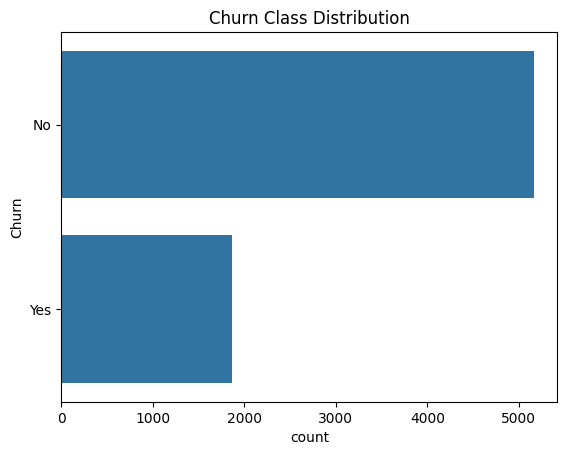

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [13]:
sns.countplot(data['Churn'])
plt.title('Churn Class Distribution')
plt.show()

print(data['Churn'].value_counts(normalize=True))

In [16]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns_initial = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns = []
binary_columns = []
for col in categorical_columns_initial:
    unique_values = data[col].dropna().unique()
    if len(unique_values) == 2:
        binary_columns.append(col)
    else:
      categorical_columns.append(col)
categorical_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

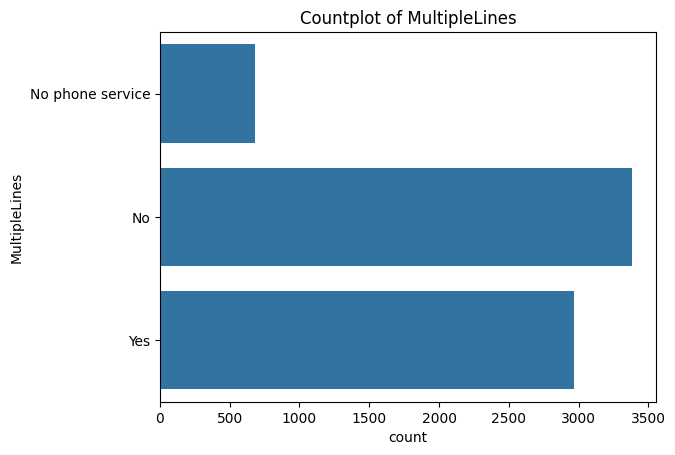

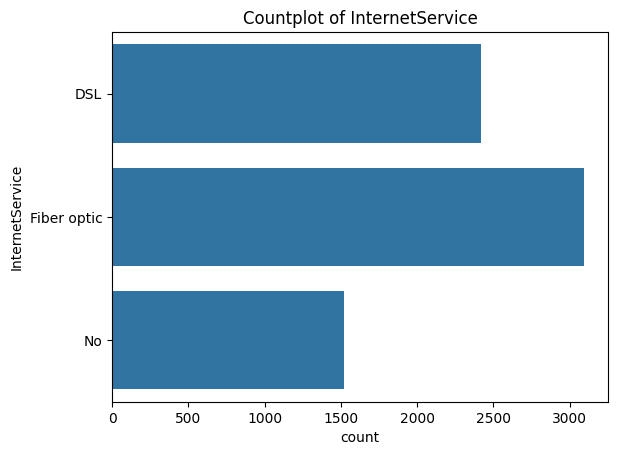

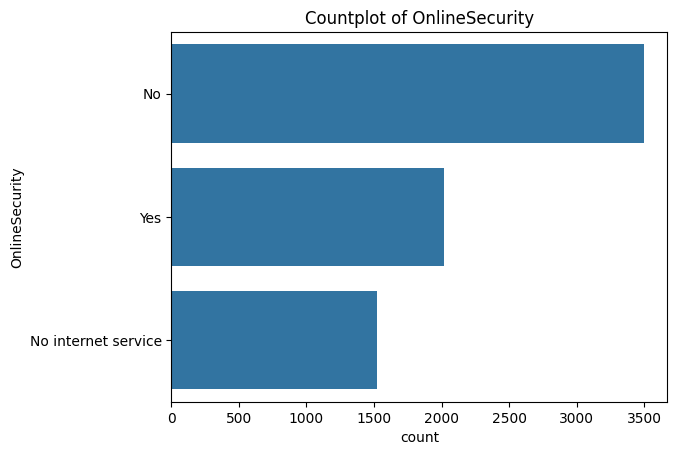

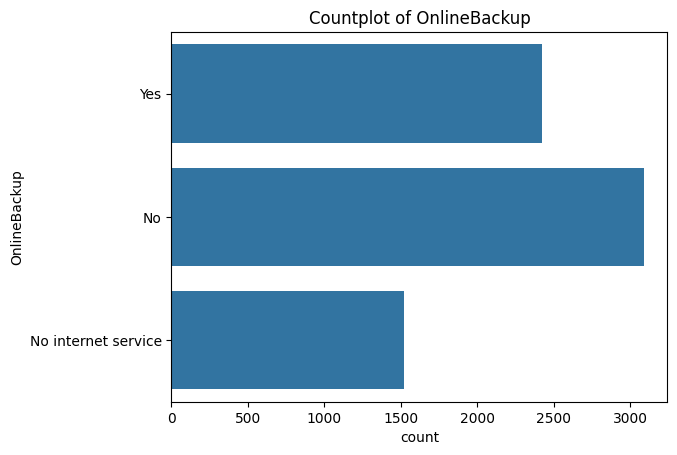

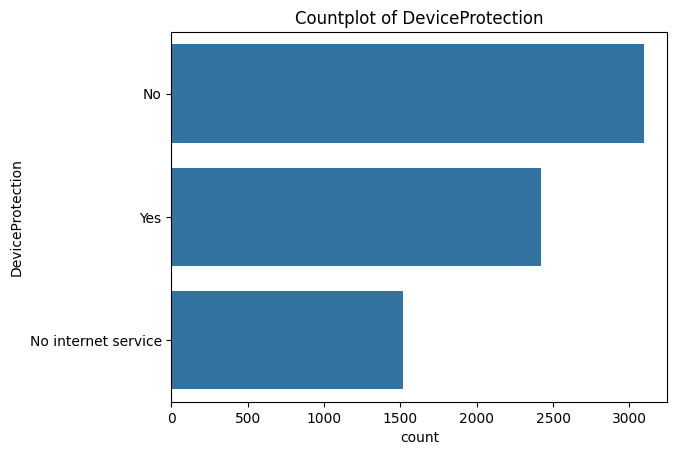

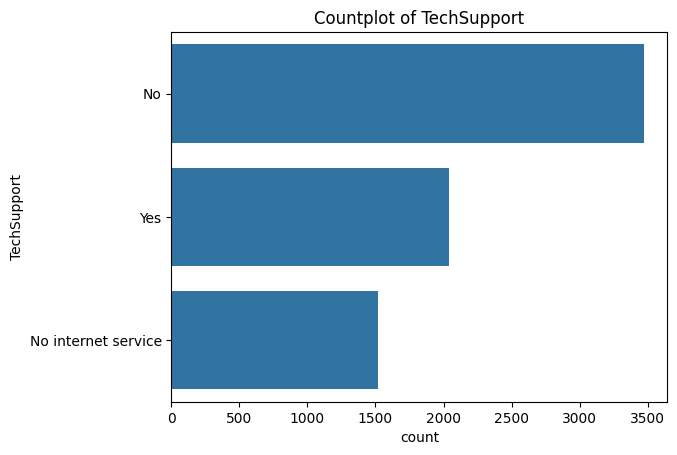

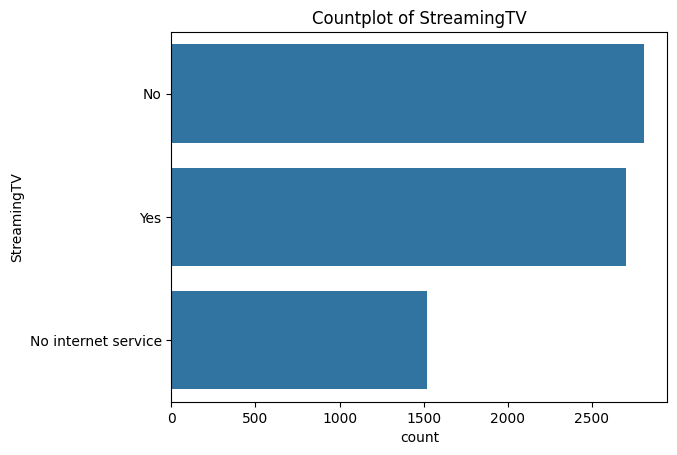

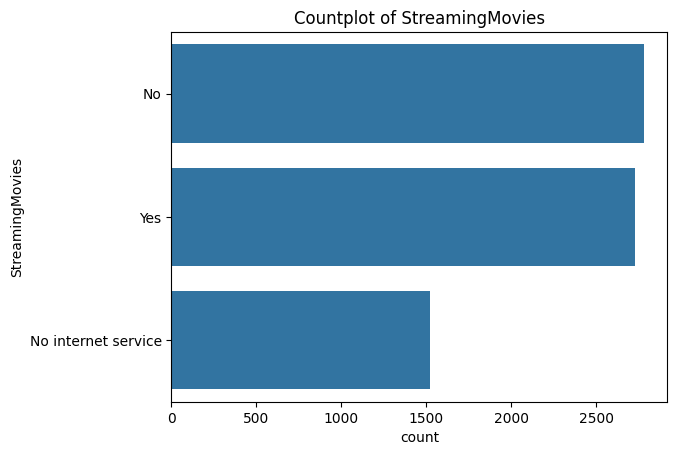

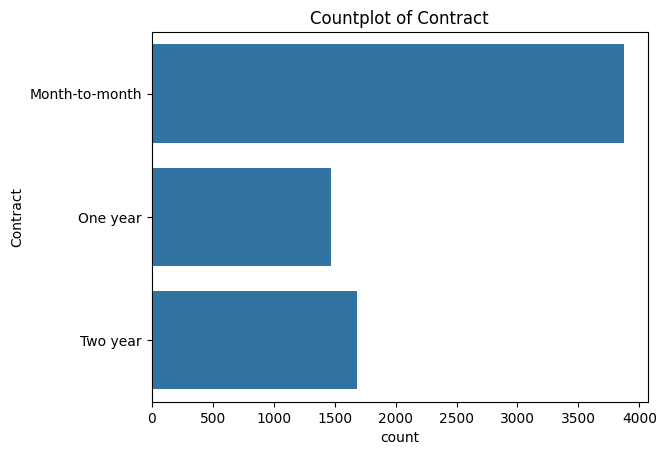

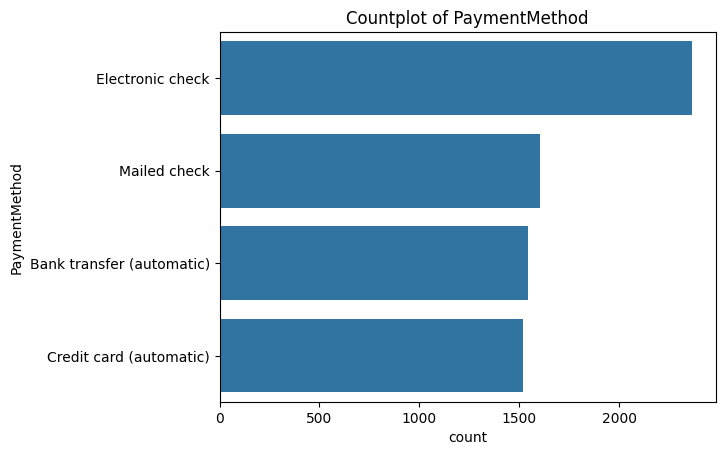

In [17]:
import seaborn as sns
for col in categorical_columns:
    sns.countplot(data[col])
    plt.title(f"Countplot of {col}")
    plt.show()

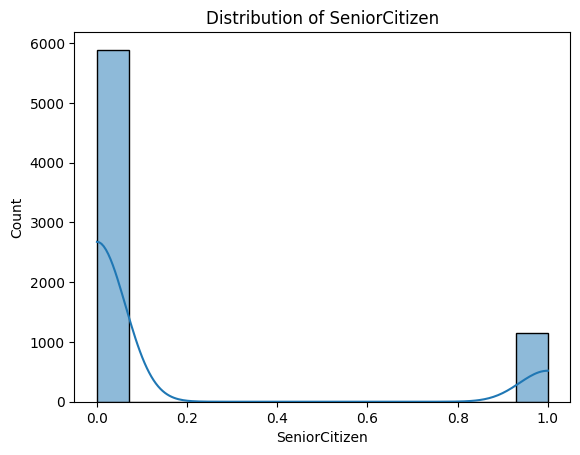

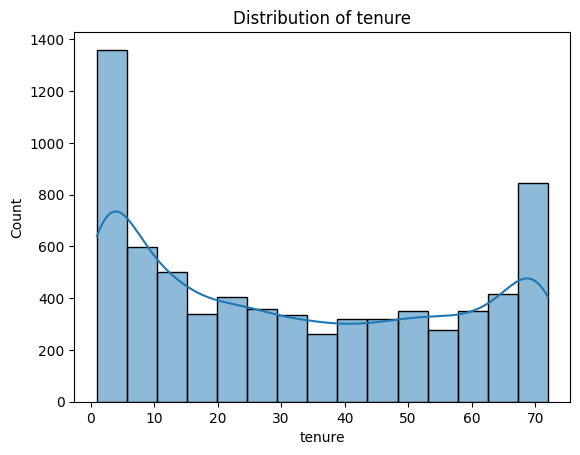

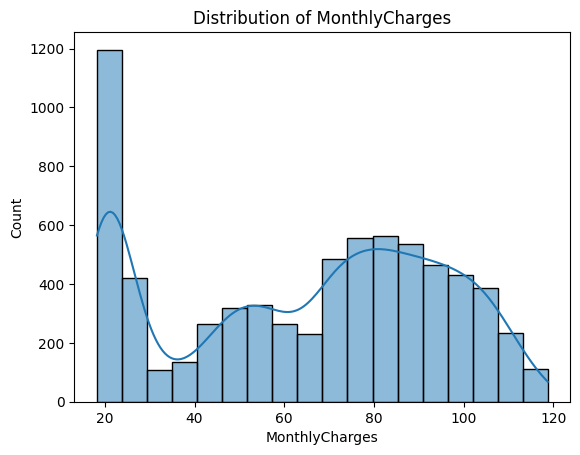

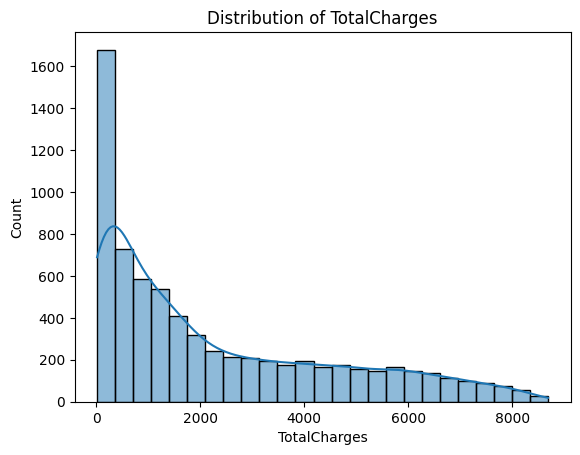

In [18]:
for col in numeric_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

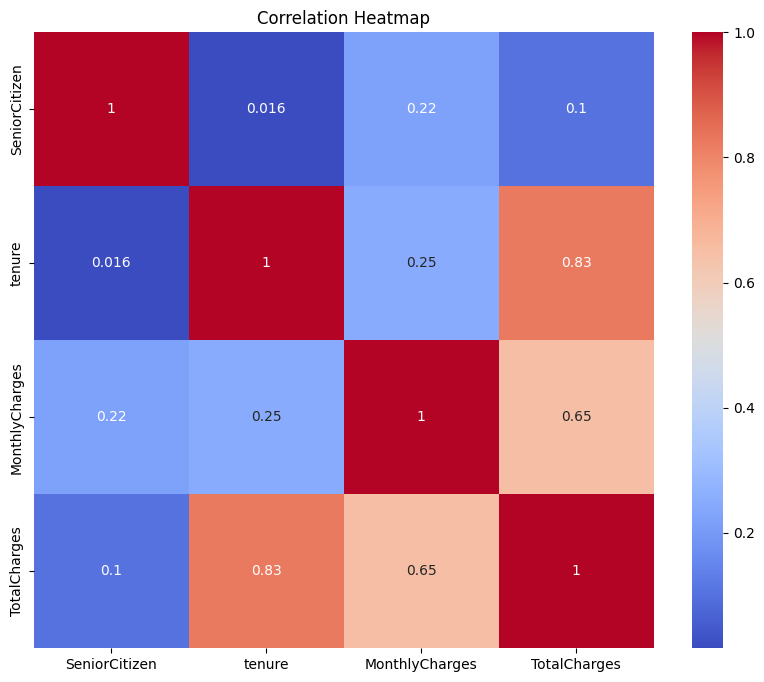

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Encoding

In [22]:
print(f"Numeric Columns: {numeric_columns}")
print(f"Binary Columns: {binary_columns}")
print(f"Categorical Columns: {categorical_columns}")
print("\nUnique Values in Categorical Columns:\n")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Binary Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Unique Values in Categorical Columns:

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Label Encoding binary columns and Scaling numerical columns

One hot encoding for non binary categorical columns(No ordinal encoding was neccessary IMO)

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
binary_columns = [col for col in binary_columns if col in data.columns]
categorical_columns = [col for col in categorical_columns if col in data.columns]
numeric_columns = [col for col in numeric_columns if col in data.columns]
label_encoder = LabelEncoder()
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])
if categorical_columns:
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = one_hot_encoder.fit_transform(data[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
    data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
    data = data.drop(columns=categorical_columns)
if numeric_columns:
    scaler = StandardScaler()
    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data.head()


<ipython-input-23-1a5b8e53df90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-23-1a5b8e53df90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-23-1a5b8e53df90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.440327,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,-0.440327,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,-0.440327,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,-0.440327,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,-0.440327,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   float64
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   float64
 11  Mult

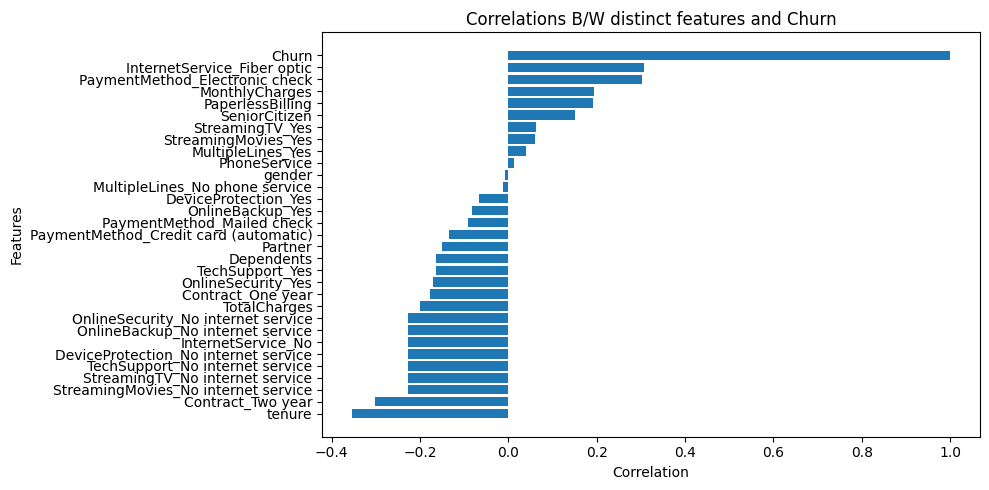

In [28]:
categorical_columns = [col for col in categorical_columns_initial if col not in binary_columns]
feature_corr = data.corr()['Churn'].sort_values(ascending=False)
sorted_corr = feature_corr.sort_values(ascending=True)
plt.figure(figsize=(10, 5))
bars = plt.barh(sorted_corr.index, sorted_corr)


plt.title('Correlations B/W distinct features and Churn')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [29]:
output_path = '/content/drive/MyDrive/cleaned_Telco_churn.csv'
data.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")

Cleaned dataset saved to /content/drive/MyDrive/cleaned_Telco_churn.csv


Mid-Project Check in:

Task 1 has been completed

Steps 1 and 2: I have shared my github repository with you and there has been multiple github commitments

Step 3: I was able to access and load the data.

Step 4: I performed a variety of EDA: Viewed value counts of each caterogical variable, looked at the class distribution for the categorical variables. I also looked at the distribution of the numeric columns. I created a correlation matrix for the numeric columns and did a correlation bar graph(in relation to churn) for all the variables.

Step 5: I'm in the midst of creating a feature. I am trying to create an Internet Access feature it is not working currently but I'm going to keep playing with it

Step 6: Scaled all my numeric columns

Step 7: I encoded all my categorical variables. Label encoded the binary columns and one-hot encoded the rest

Step 8:Refer back to step 5

Step 9:
Justification: I am trying to create a new feature called InternetAcess as it is something that shows up many times in other features but doesn't have its own isolated feature. I think this additional feature will have a strong corr with Churn and it will allow me to label encode the variables that had value counts structured like: Yes, No, No internet access since along with creating the internet access column I can remove that as a value in those columns and replace it with no. All the EDA I performed was to understand the dataset and see what type of variables are distributed in certain ways and what values each column held, as well as some visuals seeing correlation between certain variables. I also removed the columns with missing values as the dataset was large enough where I could do that and any imputation method would negatively effect the data as a whole. I encoded the object variables in a very straight forward manner. I label encoded all the binary columns and on hot encoded the rest as there was no need for a different method as ordinal encoding(which encodes them with levels to them). I also converted any columns which clearly weren't the correct data type(total charges) and removed useless columns(customer id)